In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [5]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 14ms/step - loss: 0.6924 - accuracy: 0.5472 - val_loss: 0.6912 - val_accuracy: 0.6034
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6881 - accuracy: 0.6441 - val_loss: 0.6838 - val_accuracy: 0.6684
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6639 - accuracy: 0.6996 - val_loss: 0.6277 - val_accuracy: 0.7164
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6008 - accuracy: 0.7143 - val_loss: 0.5892 - val_accuracy: 0.7206
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5762 - accuracy: 0.7308 - val_loss: 0.5702 - val_accuracy: 0.7380
Epoch 6/100
313/313 [==============================] - 5s 14ms/step - loss: 0.5579 - accuracy: 0.7459 - val_loss: 0.5540 - val_accuracy: 0.7468
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5412 - accuracy: 0.7565 - val_loss: 0.5390 - val_accuracy

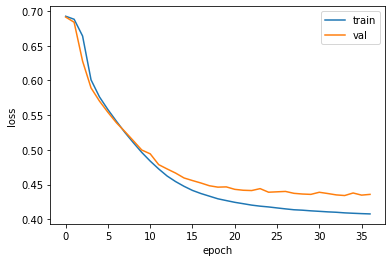

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [9]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 12ms/step - loss: 0.6923 - accuracy: 0.5317 - val_loss: 0.6916 - val_accuracy: 0.5454
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6897 - accuracy: 0.5875 - val_loss: 0.6879 - val_accuracy: 0.6094
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6829 - accuracy: 0.6322 - val_loss: 0.6768 - val_accuracy: 0.6556
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6478 - accuracy: 0.6517 - val_loss: 0.6118 - val_accuracy: 0.7164
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5903 - accuracy: 0.7323 - val_loss: 0.5789 - val_accuracy: 0.7436
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5699 - accuracy: 0.7444 - val_loss: 0.5619 - val_accuracy: 0.7536
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5544 - accuracy: 0.7530 - val_loss: 0.5450 - val_accuracy: 0.7

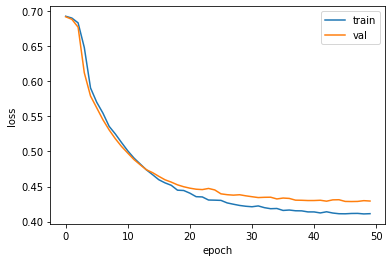

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [13]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 17ms/step - loss: 0.6927 - accuracy: 0.5313 - val_loss: 0.6920 - val_accuracy: 0.6018
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6903 - accuracy: 0.6008 - val_loss: 0.6867 - val_accuracy: 0.6644
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6668 - accuracy: 0.6654 - val_loss: 0.6257 - val_accuracy: 0.6984
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5798 - accuracy: 0.7138 - val_loss: 0.5477 - val_accuracy: 0.7308
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5388 - accuracy: 0.7368 - val_loss: 0.5171 - val_accuracy: 0.7516
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5134 - accuracy: 0.7555 - val_loss: 0.4964 - val_accuracy: 0.7684
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.4956 - accuracy: 0.7666 - val_loss: 0.4843 - val_accuracy:

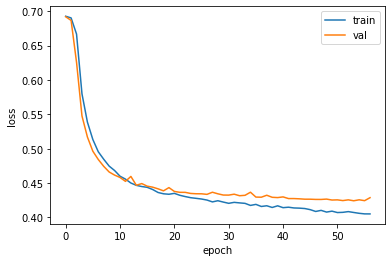

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [17]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6923 - accuracy: 0.5387 - val_loss: 0.6915 - val_accuracy: 0.5676
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6904 - accuracy: 0.5723 - val_loss: 0.6893 - val_accuracy: 0.5776
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6873 - accuracy: 0.5943 - val_loss: 0.6858 - val_accuracy: 0.5968
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6823 - accuracy: 0.6119 - val_loss: 0.6801 - val_accuracy: 0.6098
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6746 - accuracy: 0.6296 - val_loss: 0.6714 - val_accuracy: 0.6186
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6631 - accuracy: 0.6421 - val_loss: 0.6585 - val_accuracy: 0.6378
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6451 - accuracy: 0.6570 - val_loss: 0.6376 - val_accuracy: 0.654

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()